In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No any Null data present in dataset

In [5]:
df.duplicated().sum()

0

No any Data are Duplicated

In [6]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']

print('No.Of Numeric Features Are:',len(numeric_features))
numeric_features

No.Of Numeric Features Are: 11


['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [7]:
categorical_features=[features for features in df.columns if df[features].dtype == 'O']
print("No Of Categorical Features",len(categorical_features))
categorical_features

No Of Categorical Features 3


['Date', 'type', 'region']

In [8]:
year_features=[features for features in numeric_features if 'year' in features]
year_features

['year']

In [9]:
discrete_features=[features for features in numeric_features if len(df[features].unique())<25 and features not in year_features]
discrete_features

[]

In [10]:
continue_features=[feature for feature in numeric_features if feature not in discrete_features+year_features]
continue_features

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

# Visualisation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

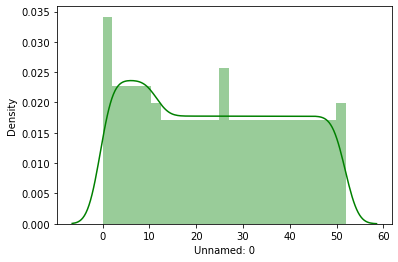

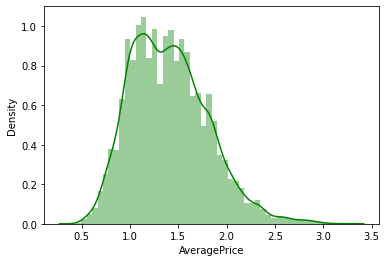

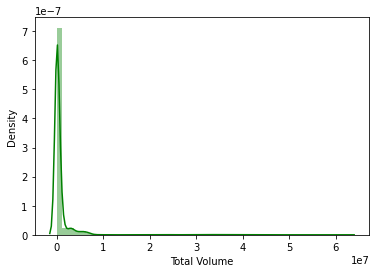

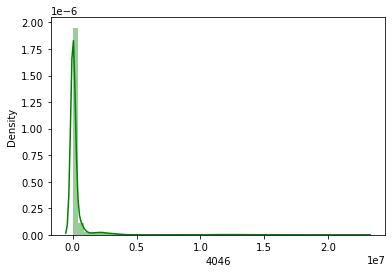

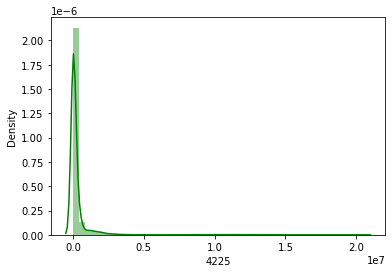

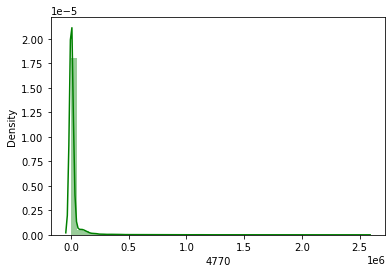

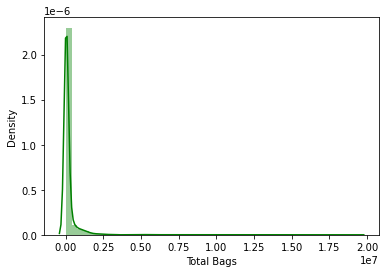

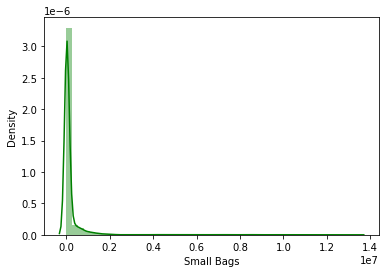

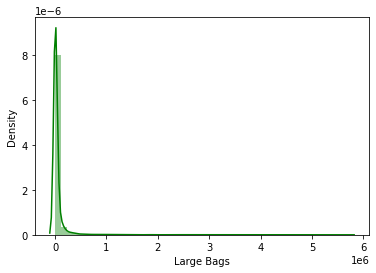

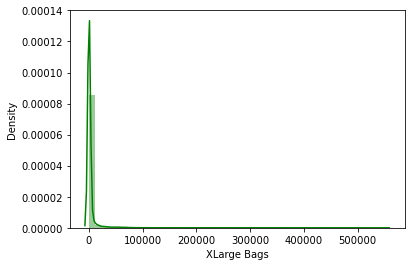

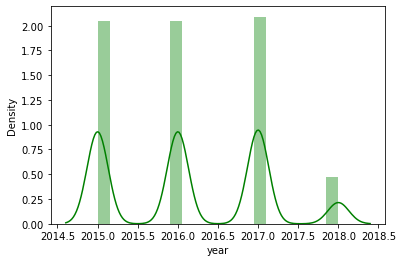

In [12]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],color='green')

From above chart we clearly say that from year 2016 to 2017 price increases and after 2017 prices down.

Number Of Each Type
 conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:title={'center':'Count Of Each Type Avacado'}, xlabel='type', ylabel='count'>

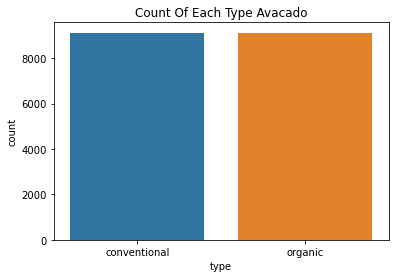

In [13]:
print("Number Of Each Type\n",df['type'].value_counts())
plt.title('Count Of Each Type Avacado')
sns.countplot(df['type'])

<AxesSubplot:title={'center':'Price Of  Type Of Avacado'}, xlabel='type', ylabel='AveragePrice'>

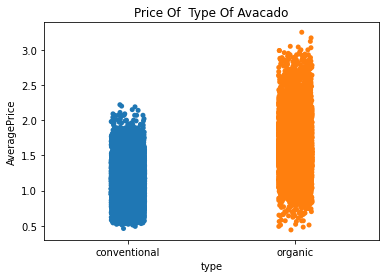

In [14]:
plt.title('Price Of  Type Of Avacado')
sns.stripplot(x='type',y='AveragePrice',data=df)

From this chart we can say Organic having higher price as compair to conventional.

Text(0.5, 1.0, 'Type vs Total Volume')

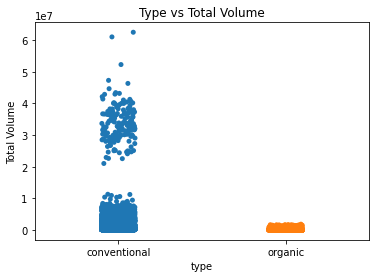

In [15]:
sns.stripplot(x='type',y='Total Volume',data=df)
plt.title('Type vs Total Volume')

this chaart clearly show that conventional having high volume as compair to organic

<AxesSubplot:title={'center':'AVERAGE PRICE PER YEAR'}, xlabel='year', ylabel='AveragePrice'>

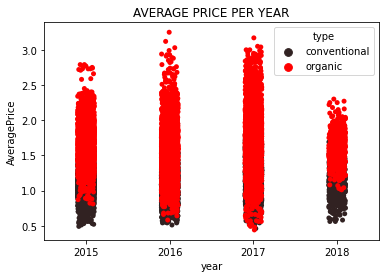

In [16]:
plt.title("AVERAGE PRICE PER YEAR")
sns.stripplot(x='year',y='AveragePrice',data=df,hue='type',color='red')

Year 2016-17 is full Expensive and 2018 is Chipest.

<AxesSubplot:title={'center':'AVACADO PRICE IN EACH REGION'}, xlabel='region', ylabel='AveragePrice'>

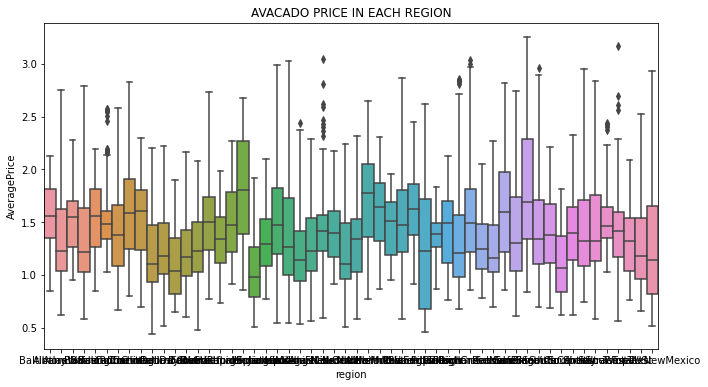

In [17]:
plt.figure(figsize=(11,6))
plt.title('AVACADO PRICE IN EACH REGION')
plt.xlabel('Region')
sns.boxplot(y=df['AveragePrice'],x=df['region'],data=df,width=1,whis=2)

From this price vs Region we can see that chicago is the chepest to sell Avacado and San Fransciso is most expencive city to sell.

<AxesSubplot:xlabel='Total Volume', ylabel='region'>

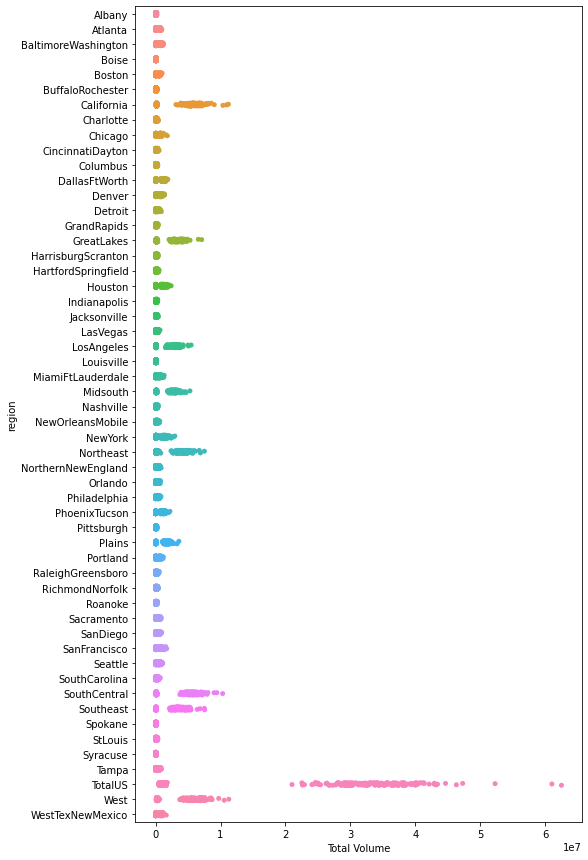

In [18]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Total Volume',y='region',data=df)

this chart indicates some region like Northeast,Midsouth,LosAngeles,GreatLeaks,California having high volume.

In [19]:
df['region'].value_counts()

Boston                 338
Sacramento             338
NewYork                338
TotalUS                338
Denver                 338
Spokane                338
BuffaloRochester       338
Northeast              338
Jacksonville           338
California             338
SanFrancisco           338
DallasFtWorth          338
NewOrleansMobile       338
StLouis                338
Nashville              338
HarrisburgScranton     338
MiamiFtLauderdale      338
Syracuse               338
Chicago                338
BaltimoreWashington    338
Detroit                338
Midsouth               338
Plains                 338
SouthCentral           338
SanDiego               338
Louisville             338
LasVegas               338
LosAngeles             338
Columbus               338
Portland               338
Seattle                338
GrandRapids            338
Southeast              338
Boise                  338
RaleighGreensboro      338
NorthernNewEngland     338
Tampa                  338
H

Text(0.5, 1.0, 'Type Average Price in Each Region')

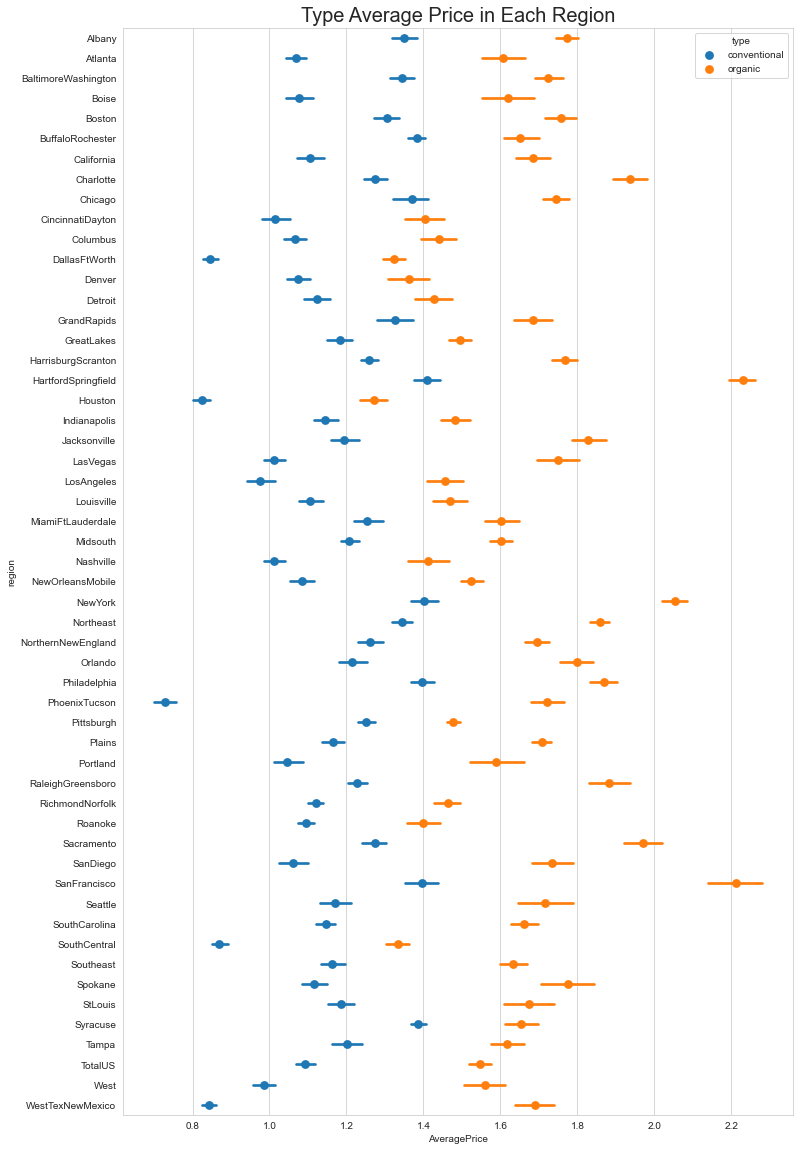

In [20]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.title("Type Average Price in Each Region",{'fontsize':20})

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

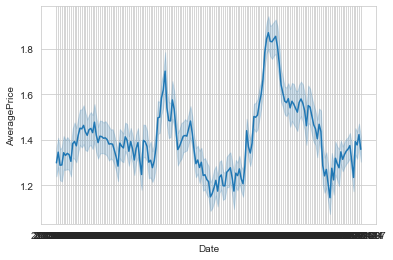

In [21]:
sns.lineplot(x='Date',y='AveragePrice',data=df)

As Price of Avacado is fluctuate is means Avacado's price is increases for some month and decreases in some month.

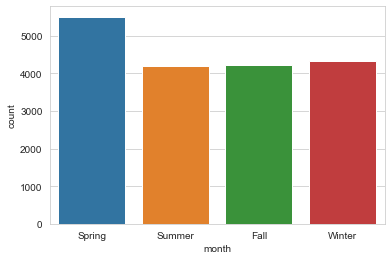

In [22]:
df['month'] = pd.DatetimeIndex(df['Date']).month
interval=(0,3,6,9,12)
categories=('Spring','Summer','Fall','Winter')
df['month']=pd.cut(df.month,interval,labels=categories)
ax=sns.countplot(x=df['month'],data=df)

We see that In Spring Season Volume Increses.

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lb=LabelEncoder()

In [25]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [26]:
df['month']=lb.fit_transform(df['month'])

In [27]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,3
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,3
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,3
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,1
18245,8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


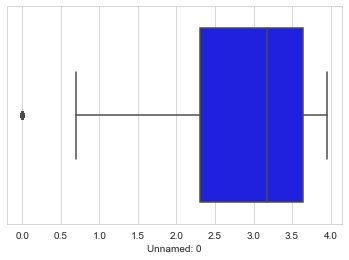

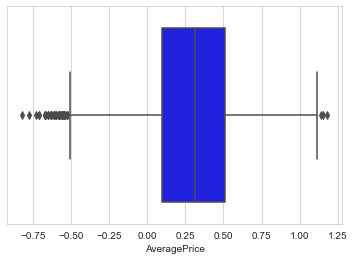

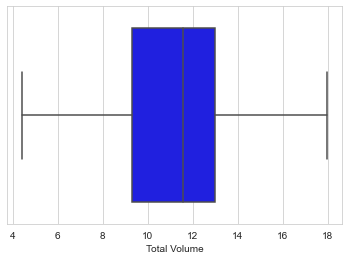

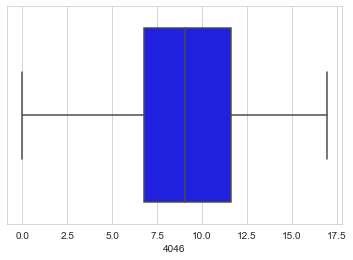

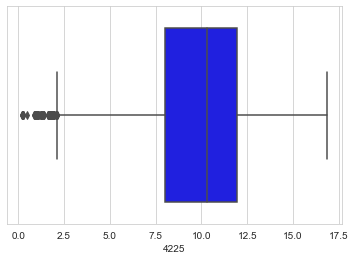

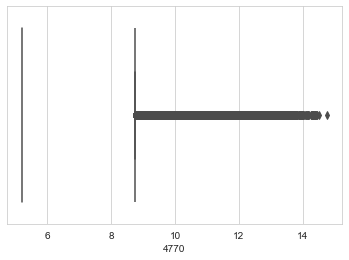

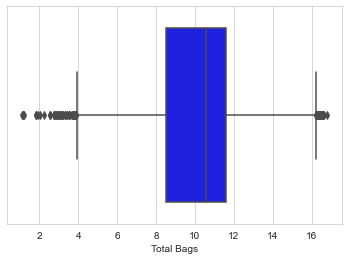

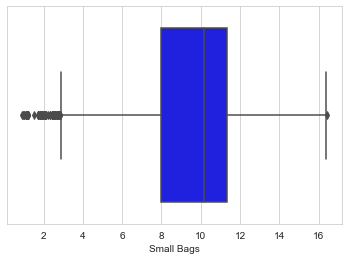

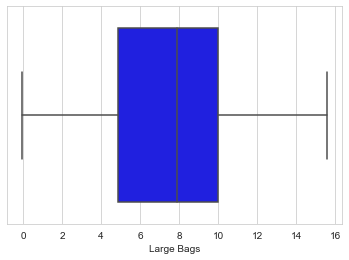

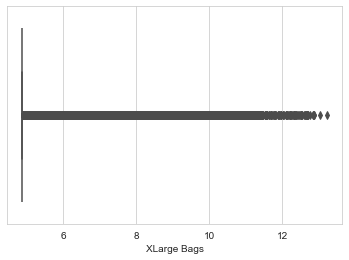

In [28]:
for features in continue_features:
    data=df.copy()
    data[features]=np.log(data[features])
    plt.figure()
    sns.boxplot(features,data=data,color='blue')

# Statastical

In [153]:
df.describe()

,Unnamed: 0,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
count,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,24.254150,83.471361,1.405363,228.363724,265.295646,54.089370,217.303485,100.850691,14.415974,0.509433,2016.137669,26.103110,1.475101
std,15.505207,48.834451,0.385793,320.155262,308.584769,90.748912,231.107247,132.892679,33.905701,0.499925,0.940239,15.396005,1.088331
min,0.000000,0.000000,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000
25%,10.000000,41.000000,1.110000,28.669234,53.756302,0.000000,52.406247,10.614140,0.000000,0.000000,2015.000000,13.000000,1.000000
50%,24.000000,83.000000,1.380000,88.234007,163.412913,12.804687,156.657493,49.483937,0.000000,1.000000,2016.000000,26.000000,1.000000
75%,38.000000,126.000000,1.660000,313.695592,358.889828,72.695250,279.981803,138.163850,8.583122,1.000000,2017.000000,39.000000,2.000000
max,52.000000,168.000000,2.610000,2021.350732,1973.525186,586.931436,1532.601559,883.995074,236.517082,1.000000,2018.000000,53.000000,3.000000


From the Statastic We get the 25%,75% and min and max of all features.we get the idea of mean also.

<AxesSubplot:>

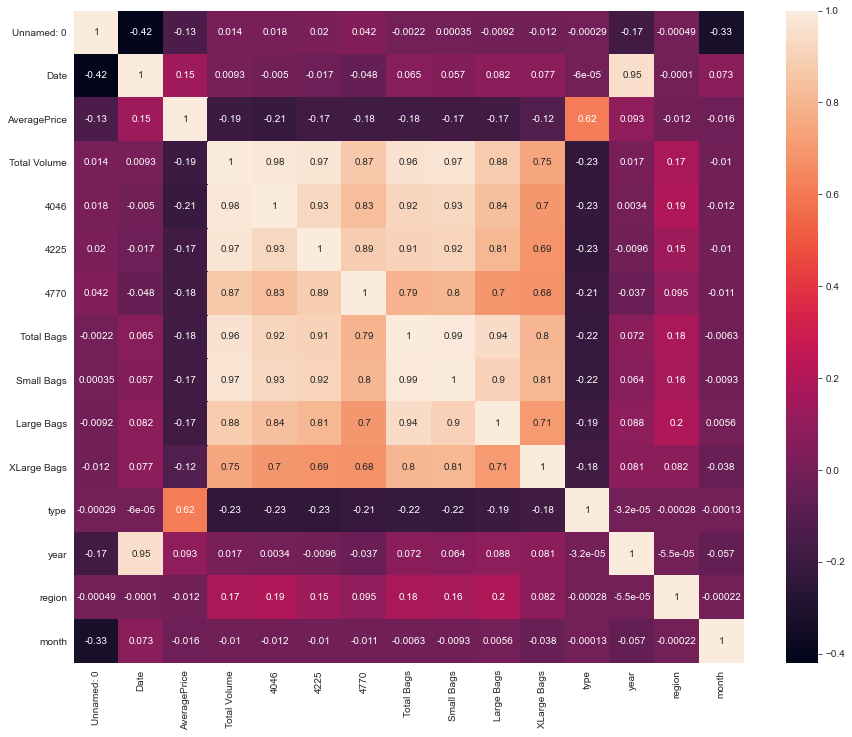

In [30]:
% corr=df.corr()
corr
plt.figure(figsize=(15,12))
sns.heatmap(data=corr,annot=True)

there are multi colinearity present in dataset so we have to check it by VIF and remove it.

# VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [34]:
valcal()

      vif factor      features
0   4.790122e+00    Unnamed: 0
1   5.152013e+00          Date
2   2.304473e+01  AveragePrice
3   5.230276e+09  Total Volume
4   6.970780e+08          4046
5   6.354666e+08          4225
6   4.990439e+06          4770
7   2.502000e+14    Total Bags
8   1.429714e+14    Small Bags
9   1.521486e+13    Large Bags
10  7.857011e+10   XLarge Bags
11  3.408048e+00          type
12  3.449279e+01          year
13  4.162541e+00        region
14  3.231251e+00         month


# Data Cleaning

In [35]:
df.skew()

Unnamed: 0       0.108334
Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.082273
dtype: float64

In [36]:
clean=pd.DataFrame()

In [152]:
clean['columns']=['total volumn','total bags']
clean['vif']=['5.23','2.35']
clean['skewness']=['9.00','9.57']
clean['outliers']=['more','more']
clean

,columns,vif,skewness,outliers
0,total volumn,5.23,9.00,more
1,total bags,2.35,9.57,more


From above we can drop both column

In [38]:
df.drop(['Total Bags','Total Volume'],axis=1,inplace=True)

In [39]:
df

,Unnamed: 0,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,51,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,3
1,1,50,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,3
2,2,49,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,3
3,3,48,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,3
4,4,47,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,1
18245,8,160,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,9,159,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,10,158,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


Removing Outliers

In [40]:
from scipy.stats import zscore

In [41]:
z=np.abs(zscore(df))

In [42]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 8, ..., 2, 2, 2], dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]

In [44]:
df_new.shape

(17651, 13)

In [45]:
df.shape

(18249, 13)

In [154]:
loss_of_data=(18249-17651)/17651*100
loss_of_data

3.3879100334258685

In [47]:
df=df_new

In [48]:
df.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
month           0.081232
dtype: float64

Removing Skewness

In [49]:
s=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [50]:
for i in s:
    df[i]=np.sqrt(df[i])

In [51]:
df.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
4046            2.497504
4225            2.128505
4770            2.636658
Small Bags      2.093752
Large Bags      2.236756
XLarge Bags     3.312484
type           -0.037741
year            0.229976
region          0.012798
month           0.081232
dtype: float64

In [53]:
x1=df.drop(['Unnamed: 0','region','Date'],axis=1)

In [54]:
x1

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,32.198447,233.355630,6.939741,92.755701,9.656604,0.0,0,2015,3
1,1.35,25.966902,211.278986,7.637408,96.995206,9.873702,0.0,0,2015,3
2,0.93,28.190424,330.378071,11.423660,89.678370,10.155787,0.0,0,2015,3
3,1.08,33.645208,268.284196,8.519390,75.348524,11.565466,0.0,0,2015,3
4,1.28,30.683546,209.376193,8.705171,77.370925,14.060228,0.0,0,2015,3
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,45.243342,39.104987,0.000000,114.310192,20.781001,0.0,1,2018,1
18245,1.71,34.521008,58.579006,0.000000,94.551785,18.022209,0.0,1,2018,1
18246,1.87,34.524194,49.525650,26.980363,96.704705,6.504614,0.0,1,2018,1
18247,1.93,39.084908,54.598901,26.963123,104.496603,7.071068,0.0,1,2018,1


In [55]:
y1=df['region']

# StandardScaler

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
std=StandardScaler()

In [58]:
X1=std.fit_transform(x1)

In [59]:
x1=X1

In [60]:
x1

array([[-0.19535234, -0.61273656, -0.10350777, ..., -1.01904715,
        -1.21001338,  1.40117505],
       [-0.1435096 , -0.63220124, -0.17505138, ..., -1.01904715,
        -1.21001338,  1.40117505],
       [-1.2322071 , -0.62525591,  0.21091212, ..., -1.01904715,
        -1.21001338,  1.40117505],
       ...,
       [ 1.20440158, -0.60547192, -0.6992442 , ...,  0.98130886,
         1.98075592, -0.43655276],
       [ 1.35992979, -0.5912262 , -0.68280335, ...,  0.98130886,
         1.98075592, -0.43655276],
       [ 0.55636736, -0.54525295, -0.70243844, ...,  0.98130886,
         1.98075592, -0.43655276]])

# Taking Target Variable=Region consider Classification problem

# Random state selection

In [61]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [62]:
lg=LogisticRegression()

In [63]:
for i in range(1,50):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    lg.fit(x1_train,y1_train)
    pred_test=lg.predict(x1_test)
    pred_train=lg.predict(x1_train)
    if round(accuracy_score(y1_test,pred_test)*100,1)==round(accuracy_score(y1_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y1_test,pred_test)*100)
        print('train score',accuracy_score(y1_train,pred_train)*100)

Random state 4 score is well
test score 49.27782497875956
train score 49.27762039660057


In [64]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=4)

In [65]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB()

In [67]:
def fun(f):
    f.fit(x1_train,y1_train)
    pred=f.predict(x1_test)
    print('Accuracy Score',accuracy_score(y1_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y1_test,pred))
    print('Classification Report\n',classification_report(y1_test,pred))
    print('F1 score',f1_score(y1_test,pred,average='micro'))

In [68]:
fun(svc)

Accuracy Score 0.6128575474369867
Confusion Matrix
 [[43  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  4  1 ...  0  0 35]]
Classification Report
               precision    recall  f1-score   support

           0       0.42      0.61      0.50        70
           1       0.47      0.49      0.48        55
           2       0.61      0.71      0.66        66
           3       1.00      0.54      0.70        69
           4       0.77      0.80      0.78        61
           5       0.79      0.42      0.55        72
           6       0.93      0.91      0.92        78
           7       0.66      0.61      0.63        75
           8       0.83      0.93      0.88        70
           9       0.50      0.70      0.58        66
          10       0.42      0.43      0.43        76
          11       0.59      0.75      0.66        71
          12       0.72      0.68      0.70        57
          13

In [69]:
fun(dtc)

Accuracy Score 0.8079864061172473
Confusion Matrix
 [[61  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  1]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  2  1 ...  0  0 54]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.87      0.88        70
           1       0.70      0.78      0.74        55
           2       0.86      0.91      0.88        66
           3       0.75      0.80      0.77        69
           4       0.87      0.85      0.86        61
           5       0.81      0.76      0.79        72
           6       0.99      0.99      0.99        78
           7       0.81      0.76      0.79        75
           8       0.90      0.89      0.89        70
           9       0.87      0.70      0.77        66
          10       0.74      0.68      0.71        76
          11       0.89      0.83      0.86        71
          12       0.88      0.79      0.83        57
          13

In [70]:
fun(knn)

Accuracy Score 0.7116964032851884
Confusion Matrix
 [[51  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  0  0 ...  0  0 45]]
Classification Report
               precision    recall  f1-score   support

           0       0.55      0.73      0.63        70
           1       0.42      0.67      0.51        55
           2       0.79      0.86      0.83        66
           3       0.65      0.74      0.69        69
           4       0.81      0.93      0.87        61
           5       0.59      0.60      0.59        72
           6       0.91      0.95      0.93        78
           7       0.68      0.69      0.69        75
           8       0.92      0.93      0.92        70
           9       0.59      0.62      0.61        66
          10       0.48      0.59      0.53        76
          11       0.72      0.76      0.74        71
          12       0.79      0.81      0.80        57
          13

# Hyperparameter Tuning For Best Score

In [71]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svc,param,cv=5)
gd.fit(x1,y1)
print(gd.best_params_)

{'kernel': 'linear'}


In [72]:
param={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,param)
gd.fit(x1,y1)
print(gd.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'splitter': 'best'}


In [73]:
param={'n_neighbors':[7,5,11],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param)
gd.fit(x1,y1)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [74]:
svc1=SVC(kernel='linear')
dtc1=DecisionTreeClassifier(criterion='entropy',max_features='log2',splitter='random',max_depth=5)
knn1=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
nb=MultinomialNB()

In [75]:
fun(dtc1)

Accuracy Score 0.07958085528178986
Confusion Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        72
           6       0.87      0.26      0.40        78
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00        70
           9       0.12      0.08      0.09        66
          10       0.00      0.00      0.00        76
          11       0.48      0.20      0.28        71
          12       0.00      0.00      0.00        57
          13       0.07      0.29      0.11    

In [76]:
fun(svc1)

Accuracy Score 0.6086094590767488
Confusion Matrix
 [[52  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  4  1 ...  0  0 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.74      0.62        70
           1       0.26      0.36      0.30        55
           2       0.87      0.91      0.89        66
           3       0.44      0.51      0.47        69
           4       0.53      0.75      0.63        61
           5       0.64      0.50      0.56        72
           6       0.89      0.86      0.88        78
           7       0.68      0.71      0.69        75
           8       0.86      0.93      0.89        70
           9       0.58      0.68      0.63        66
          10       0.52      0.43      0.47        76
          11       0.58      0.59      0.58        71
          12       0.57      0.63      0.60        57
          13

In [77]:
fun(knn1)

Accuracy Score 0.7737184933446616
Confusion Matrix
 [[56  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  1  0 ...  0  0 49]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        70
           1       0.60      0.69      0.64        55
           2       0.91      0.89      0.90        66
           3       0.79      0.77      0.78        69
           4       0.89      0.93      0.91        61
           5       0.76      0.61      0.68        72
           6       0.97      0.96      0.97        78
           7       0.73      0.72      0.72        75
           8       0.97      0.93      0.95        70
           9       0.75      0.71      0.73        66
          10       0.59      0.63      0.61        76
          11       0.79      0.80      0.80        71
          12       0.84      0.86      0.85        57
          13

# Ensembel Method

In [78]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [79]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()
Gd=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)

In [80]:
fun(rf)

Accuracy Score 0.9221183800623053
Confusion Matrix
 [[65  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  1 65  0]
 [ 0  1  0 ...  0  0 63]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.79      0.87      0.83        55
           2       0.96      0.98      0.97        66
           3       0.97      0.91      0.94        69
           4       0.97      1.00      0.98        61
           5       0.91      0.82      0.86        72
           6       1.00      1.00      1.00        78
           7       0.94      0.87      0.90        75
           8       0.97      0.97      0.97        70
           9       0.98      0.86      0.92        66
          10       0.90      0.93      0.92        76
          11       0.95      0.87      0.91        71
          12       0.95      0.95      0.95        57
          13

In [81]:
fun(ad)

Accuracy Score 0.04927782497875956
Confusion Matrix
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  9  3  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ... 26  1  0]
 [ 0  0  0 ... 17 19  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        72
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00        66
          10       0.00      0.00      0.00        76
          11       0.00      0.00      0.00        71
          12       0.00      0.00      0.00        57
          1

In [82]:
fun(gd)

Accuracy Score 0.7737184933446616
Confusion Matrix
 [[56  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  1  0 ...  0  0 49]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        70
           1       0.60      0.69      0.64        55
           2       0.91      0.89      0.90        66
           3       0.79      0.77      0.78        69
           4       0.89      0.93      0.91        61
           5       0.76      0.61      0.68        72
           6       0.97      0.96      0.97        78
           7       0.73      0.72      0.72        75
           8       0.97      0.93      0.95        70
           9       0.75      0.71      0.73        66
          10       0.59      0.63      0.61        76
          11       0.79      0.80      0.80        71
          12       0.84      0.86      0.85        57
          13

# Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [84]:
for i in range(2,10):
    score=cross_val_score(svc1,x1,y1,cv=i)
    print('AT value of',i,score.mean())

AT value of 2 0.07223375566267318
AT value of 3 0.3415025757771675
AT value of 4 0.4099404108523835
AT value of 5 0.4629721535601708
AT value of 6 0.46291300478255293
AT value of 7 0.5026122252022627
AT value of 8 0.5173980495998679
AT value of 9 0.51836719299647


In [85]:
score=cross_val_score(svc1,x1,y1,cv=10)
score.mean()

0.525400209817805

In [86]:
score=cross_val_score(dtc,x1,y1,cv=10)
score.mean()

0.6387142403408417

In [87]:
score=cross_val_score(knn1,x1,y1,cv=10)
score.mean()

0.45315673133375467

In [88]:
score=cross_val_score(rf,x1,y1,cv=10)
score.mean()

0.7806312179378183

In [89]:
score=cross_val_score(ad,x1,y1,cv=10)
score.mean()

0.052462279314338514

In [90]:
score=cross_val_score(gd,x1,y1,cv=10)
score.mean()

0.4500972412487688

# Saving Model

In [91]:
import pickle
filename='Avacado_Classi_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [92]:
res=pd.DataFrame()
res['Actual']=y1_test
res['Predict']=rf.predict(x1_test)

print(res)

       Actual  Predict
8701       18       18
1227       23       23
17773      14       14
12338       7        7
12862      17       17
...       ...      ...
15787      19       19
12768      16       16
7219       30       30
3328       10       10
2754       52       52

[3531 rows x 2 columns]


# Consider Target Variable as AveragePrice Consider Regressior Problem

In [93]:
df

,Unnamed: 0,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,51,1.33,32.198447,233.355630,6.939741,92.755701,9.656604,0.0,0,2015,0,3
1,1,50,1.35,25.966902,211.278986,7.637408,96.995206,9.873702,0.0,0,2015,0,3
2,2,49,0.93,28.190424,330.378071,11.423660,89.678370,10.155787,0.0,0,2015,0,3
3,3,48,1.08,33.645208,268.284196,8.519390,75.348524,11.565466,0.0,0,2015,0,3
4,4,47,1.28,30.683546,209.376193,8.705171,77.370925,14.060228,0.0,0,2015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,45.243342,39.104987,0.000000,114.310192,20.781001,0.0,1,2018,53,1
18245,8,160,1.71,34.521008,58.579006,0.000000,94.551785,18.022209,0.0,1,2018,53,1
18246,9,159,1.87,34.524194,49.525650,26.980363,96.704705,6.504614,0.0,1,2018,53,1
18247,10,158,1.93,39.084908,54.598901,26.963123,104.496603,7.071068,0.0,1,2018,53,1


In [94]:
x2=df.drop(['Unnamed: 0','Date','AveragePrice'],axis=1)
y2=df['AveragePrice']

In [95]:
x2.shape

(17651, 10)

# Standard Scaler

In [96]:
X2=std.fit_transform(x2)

In [97]:
x2=X2

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [99]:
ln=LinearRegression()

# Random State Selection

In [100]:
for i in range(0,100):
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=i,test_size=0.20)
    ln.fit(x2_train,y2_train)
    pred_train=ln.predict(x2_train)
    pred_test=ln.predict(x2_test)
    if round(r2_score(y2_train,pred_train)*100,1)==round(r2_score(y2_test,pred_test)*100,1):
        print("At Random score",i,"Model Performance is very well")
        print("Random stata is:",i)
        print("Train Score",r2_score(y2_train,pred_train)*100)
        print("Test Score",r2_score(y2_test,pred_test)*100)

At Random score 30 Model Performance is very well
Random stata is: 30
Train Score 44.69545814257398
Test Score 44.69163950674323
At Random score 81 Model Performance is very well
Random stata is: 81
Train Score 44.70900017110886
Test Score 44.68612890670948


In [101]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=81,test_size=0.20)

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [103]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [104]:
def fun2(f):
    f.fit(x2_train,y2_train)
    pred=f.predict(x2_test)
    print('Taining Score:-',f.score(x2_train,y2_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y2_test,pred))
    print('Mean Squared Error',mean_squared_error(y2_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y2_test,pred)))
    print('R2 Score',r2_score(y2_test,pred))

In [144]:
fun2(ln)

Taining Score:- 44.70900017110886
Mean Absolute Error 0.22750722246621158
Mean Squared Error 0.0829314304228294
Root Mean Squared Erro 0.2879781769906001
R2 Score 0.44686128906709477


In [105]:
fun2(svr)

Taining Score:- 72.84684174450675
Mean Absolute Error 0.15436594289878777
Mean Squared Error 0.0428396433868549
Root Mean Squared Erro 0.20697739825124603
R2 Score 0.7142667743819939


In [106]:
fun2(svrl)

Taining Score:- 44.48057040024212
Mean Absolute Error 0.22685820971508616
Mean Squared Error 0.08316685720610208
Root Mean Squared Erro 0.2883866453324461
R2 Score 0.4452910319672886


In [107]:
fun2(svrp)

Taining Score:- 54.033221243333344
Mean Absolute Error 0.20332553940726023
Mean Squared Error 0.07083657108952866
Root Mean Squared Erro 0.2661514063264154
R2 Score 0.5275319692474179


In [108]:
fun2(dtc)

Taining Score:- 100.0
Mean Absolute Error 0.13324553950722176
Mean Squared Error 0.042086179552534686
Root Mean Squared Erro 0.20514916415265913
R2 Score 0.719292251597635


In [109]:
fun2(knn)

Taining Score:- 91.06311550186463
Mean Absolute Error 0.1045800056641178
Mean Squared Error 0.022167791560464455
Root Mean Squared Erro 0.148888520579877
R2 Score 0.8521445538143136


# Ensemble Method

In [110]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [111]:
rf2=RandomForestRegressor()
ad2=AdaBoostRegressor()
gd2=GradientBoostingRegressor()

In [112]:
fun2(rf2)

Taining Score:- 98.14662923878277
Mean Absolute Error 0.10066207873123761
Mean Squared Error 0.02042833857264231
Root Mean Squared Erro 0.14292773898947086
R2 Score 0.8637464130672738


In [113]:
fun2(ad2)

Taining Score:- 52.96640485451445
Mean Absolute Error 0.21757564127207515
Mean Squared Error 0.07172186632126888
Root Mean Squared Erro 0.2678093843039651
R2 Score 0.5216271987546972


In [114]:
fun2(gd2)

Taining Score:- 73.26929731712168
Mean Absolute Error 0.15764828474030881
Mean Squared Error 0.04146442080425098
Root Mean Squared Erro 0.20362814344842164
R2 Score 0.7234392780119079


# Regulization

In [115]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [116]:
ls=Lasso(alpha=0.0001,normalize=False)
rd=Ridge(alpha=0.0001)
es=ElasticNet(alpha=0.0001)

In [117]:
fun2(ls)

Taining Score:- 44.70875394566328
Mean Absolute Error 0.22749460543155908
Mean Squared Error 0.08293181894700867
Root Mean Squared Erro 0.28797885156206987
R2 Score 0.44685869767607944


In [118]:
fun2(rd)

Taining Score:- 44.70900017110886
Mean Absolute Error 0.22750722245405658
Mean Squared Error 0.0829314304270996
Root Mean Squared Erro 0.2879781769980142
R2 Score 0.4468612890386132


In [119]:
fun2(es)

Taining Score:- 44.70893068019536
Mean Absolute Error 0.2275006900520423
Mean Squared Error 0.08293157291541237
Root Mean Squared Erro 0.28797842439219706
R2 Score 0.4468603386655009


# Hyper Tunning

RandomForestRegressor

In [120]:
p2={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':['True','False']}

In [121]:
gd2=GridSearchCV(rf2,p2)
gd2.fit(x2,y2)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['mse', 'absolute_error', 'possion'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 75, 100, 200, 250, 500]})

In [122]:
print(gd2.best_params_)

{'bootstrap': 'False', 'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 500}


In [123]:
rf22=RandomForestRegressor(criterion='mse',n_estimators=500,max_features='log2',bootstrap=True)

In [124]:
fun2(rf22)

Taining Score:- 98.25509973338431
Mean Absolute Error 0.09891766071934309
Mean Squared Error 0.019089340732143897
Root Mean Squared Erro 0.13816418035129038
R2 Score 0.8726773037520118


KNeighborsRegressor

In [125]:
p3={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [126]:
gd3=GridSearchCV(knn,p3)

In [127]:
gd3.fit(x2,y2)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [128]:
print(gd3.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [129]:
knn2=KNeighborsRegressor(n_neighbors=5,algorithm='auto',p=2,weights='uniform')

In [130]:
fun2(knn2)

Taining Score:- 91.06311550186463
Mean Absolute Error 0.1045800056641178
Mean Squared Error 0.022167791560464455
Root Mean Squared Erro 0.148888520579877
R2 Score 0.8521445538143136


# Cross Validation

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
for i in range(2,11):
    score=cross_val_score(svr,x2,y2,cv=i)
    print("At the CV=",i,'Score=',score.mean())

At the CV= 2 Score= -0.6836998616689709
At the CV= 3 Score= 0.015017099420383428
At the CV= 4 Score= 0.1315573860006614
At the CV= 5 Score= 0.12374480336366216
At the CV= 6 Score= 0.15933282048681582
At the CV= 7 Score= 0.16931556525386535
At the CV= 8 Score= 0.2439139726439668
At the CV= 9 Score= 0.23989487960672268
At the CV= 10 Score= 0.26661510042578973


In [133]:
score=cross_val_score(svrl,x2,y2,cv=10)
print(score.mean())

0.003385268471764247


In [134]:
score=cross_val_score(dtc,x2,y2,cv=10)
print(score.mean())

-0.19966735183760578


In [135]:
score=cross_val_score(knn2,x2,y2,cv=10)
print(score.mean())

-0.1832417137193231


In [136]:
score=cross_val_score(rf22,x2,y2,cv=25)
print(score.mean())

0.46351278024873543


In [140]:
score=cross_val_score(ls,x2,y2,cv=10)
print(score.mean())

0.007933666100100567


In [141]:
score=cross_val_score(rd,x2,y2,cv=10)
print(score.mean())

0.007685483971037954


# Saving Model

In [142]:
import pickle
filename='Avacado Regressor Prediction.pkl'
pickle.dump(rf22,open(filename,'wb'))

# Conclusion

       Actual  Predict
16587    1.41  1.51204
7842     0.92  1.27804
4125     1.30  1.21408
2965     1.02  1.10650
10384    1.51  1.54822
...       ...      ...
12179    1.73  1.51358
9316     1.55  1.54570
12222    1.54  1.58070
14550    1.39  1.42778
1507     1.09  1.21578

[3531 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regressor Line')

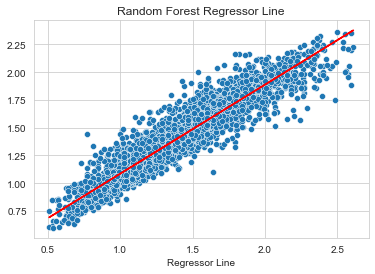

In [150]:
rs=pd.DataFrame()
rs['Actual']=y2_test
rs['Predict']=rf22.predict(x2_test)

rs

print(rs)
x=np.array(y2_test)
y=np.array(rf22.predict(x2_test))

sns.scatterplot(x,y)

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b,color='red')
plt.xlabel('Regressor Line')
plt.title('Random Forest Regressor Line')